In [1]:
import numpy as np
import pandas as pd

# DatetimeIndex
dates = pd.date_range("2020-01-01", periods=48, freq="M")

# additive model : trend + seasonality +irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({"timeseries" : trend_factor + cycle_factor + seasonal_factor + irregular_factor,
                   "trend" : trend_factor,
                   "cycle" : cycle_factor,
                   "seasonal" : seasonal_factor,
                   "irregular" : irregular_factor},
                   index = dates)

In [2]:
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,5.904327,1.491495


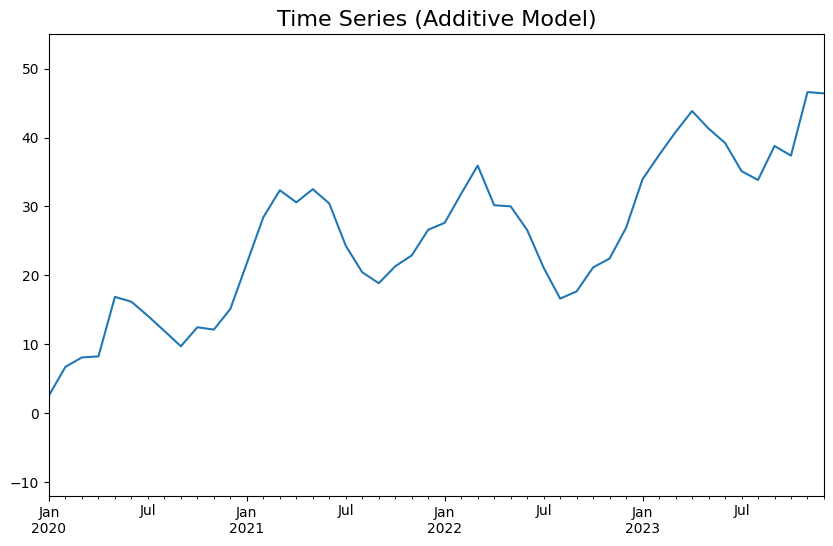

In [3]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 6])
df.timeseries.plot()
plt.title("Time Series (Additive Model)", fontsize=16)
plt.ylim(-12, 55)
plt.show()

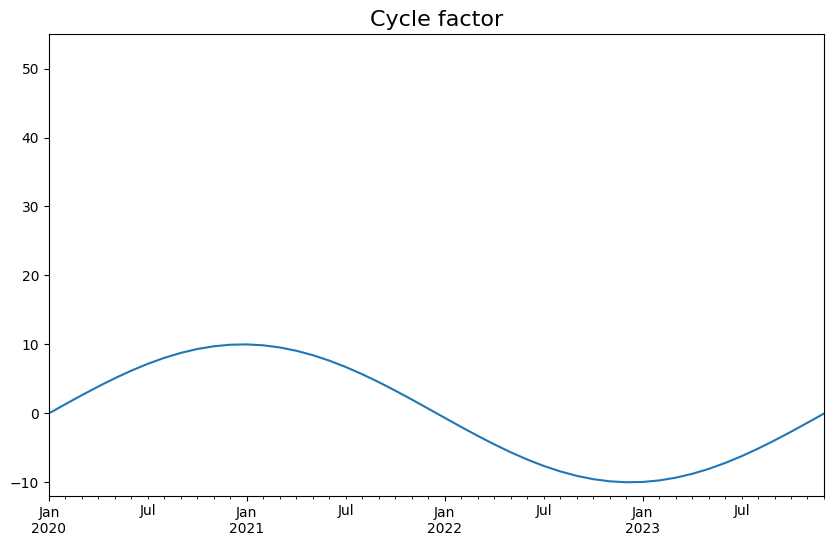

In [4]:
# Cycle plot

plt.figure(figsize=[10, 6])
df.cycle.plot()
plt.title("Cycle factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

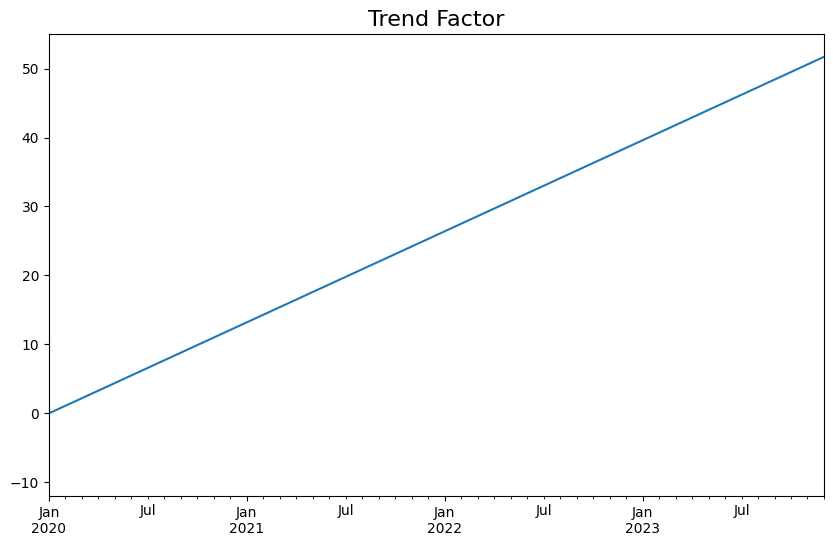

In [5]:
# Trend variation

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

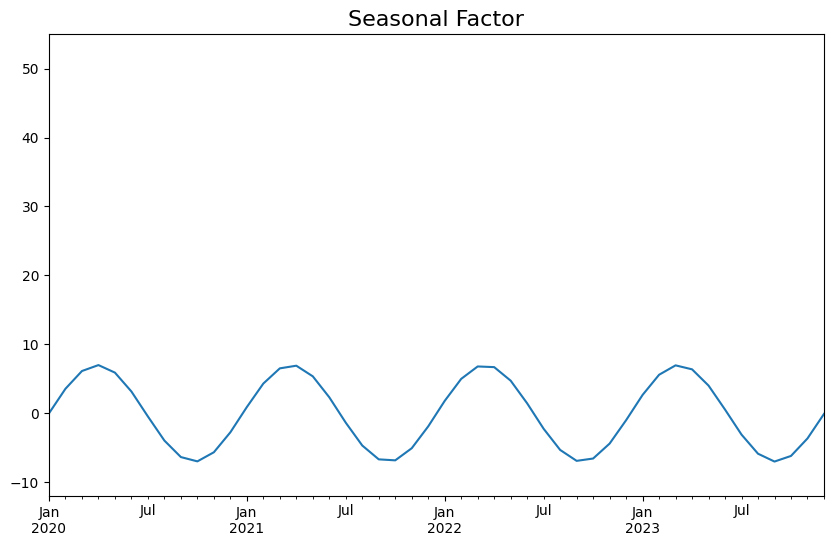

In [6]:
# -- Seasonal factor

plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title('Seasonal Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

Text(0.5, 1.0, 'Close Price for Apple')

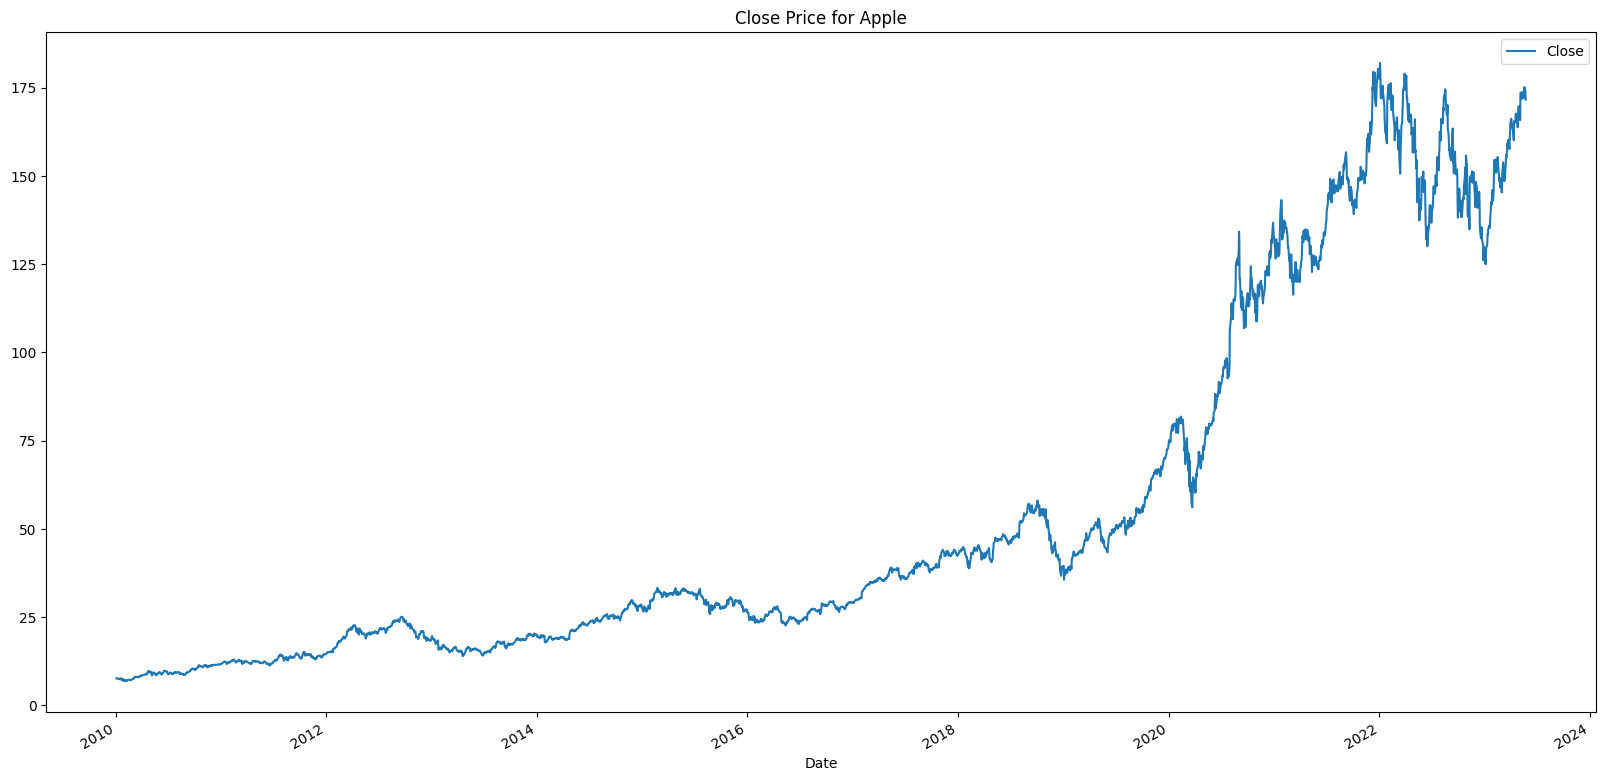

In [7]:
import FinanceDataReader as fdr

# 2010년 ~ 현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader("AAPL", start = "2010")

# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

df_apple[["Close"]].plot(figsize=(20, 10))
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean()
plt.title("Close Price for Apple")


<Axes: xlabel='Date'>

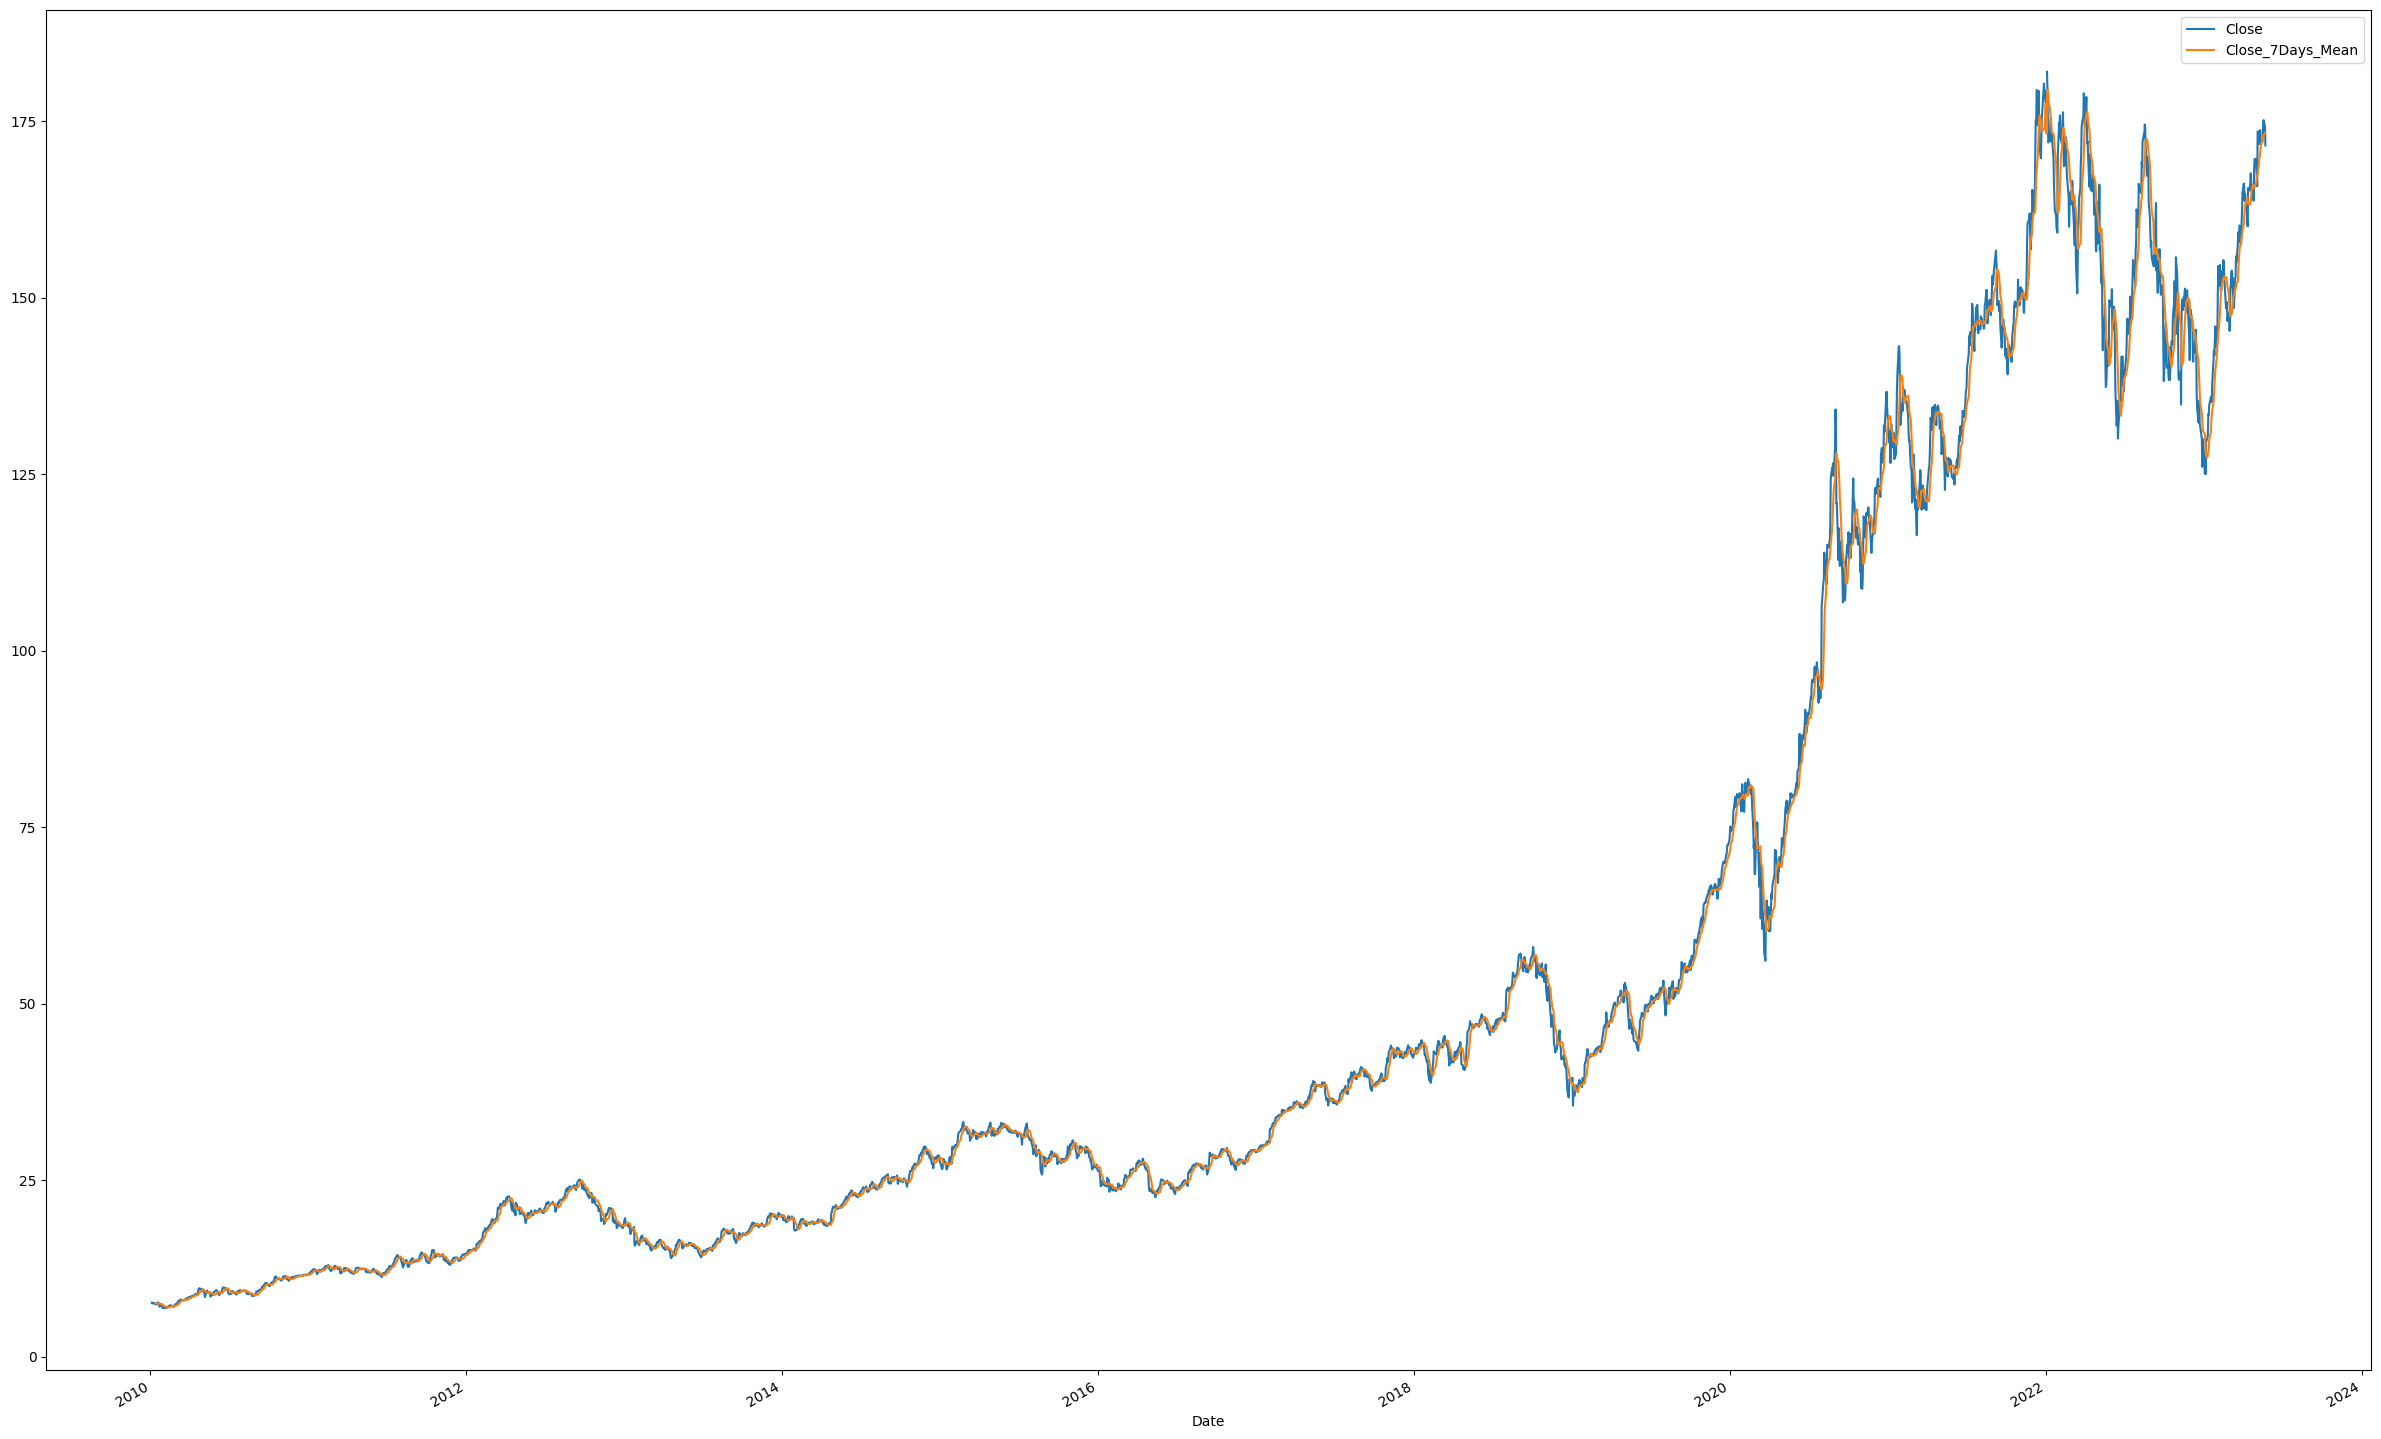

In [8]:
from datetime import datetime
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean().shift(1)
df_apple[["Close", "Close_7Days_Mean"]].plot(figsize=(30, 20))
# 7일전 평균값 그래프 + 종가 그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

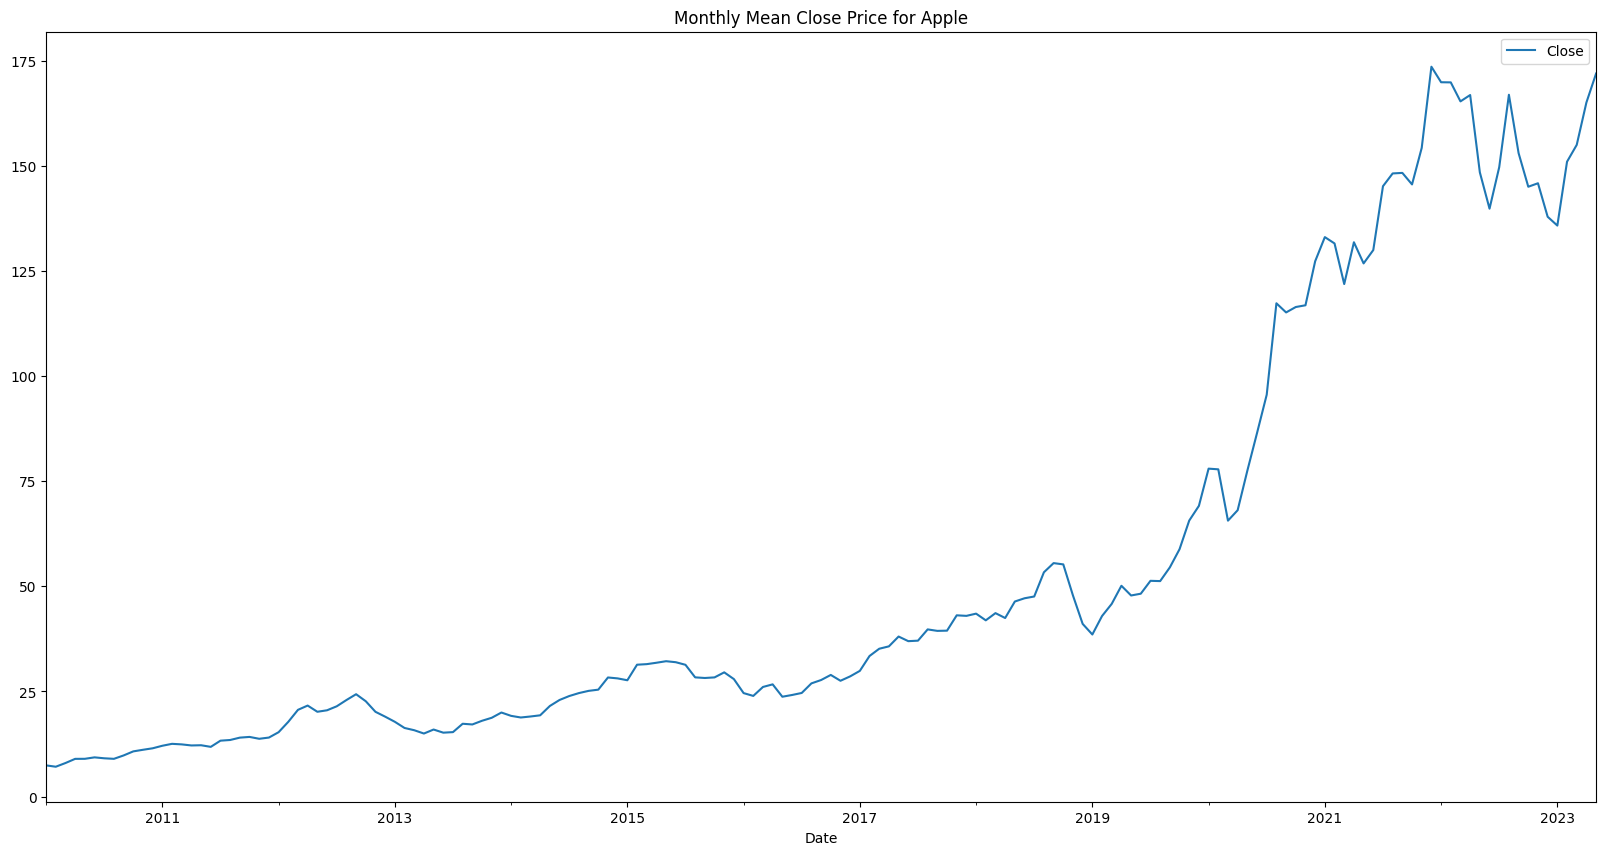

In [9]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule="M").mean()
# 마지막 컬럼 (Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[["Close"]].plot(figsize = (20, 10))
plt.title("Monthly Mean Close Price for Apple")

<Axes: xlabel='Date'>

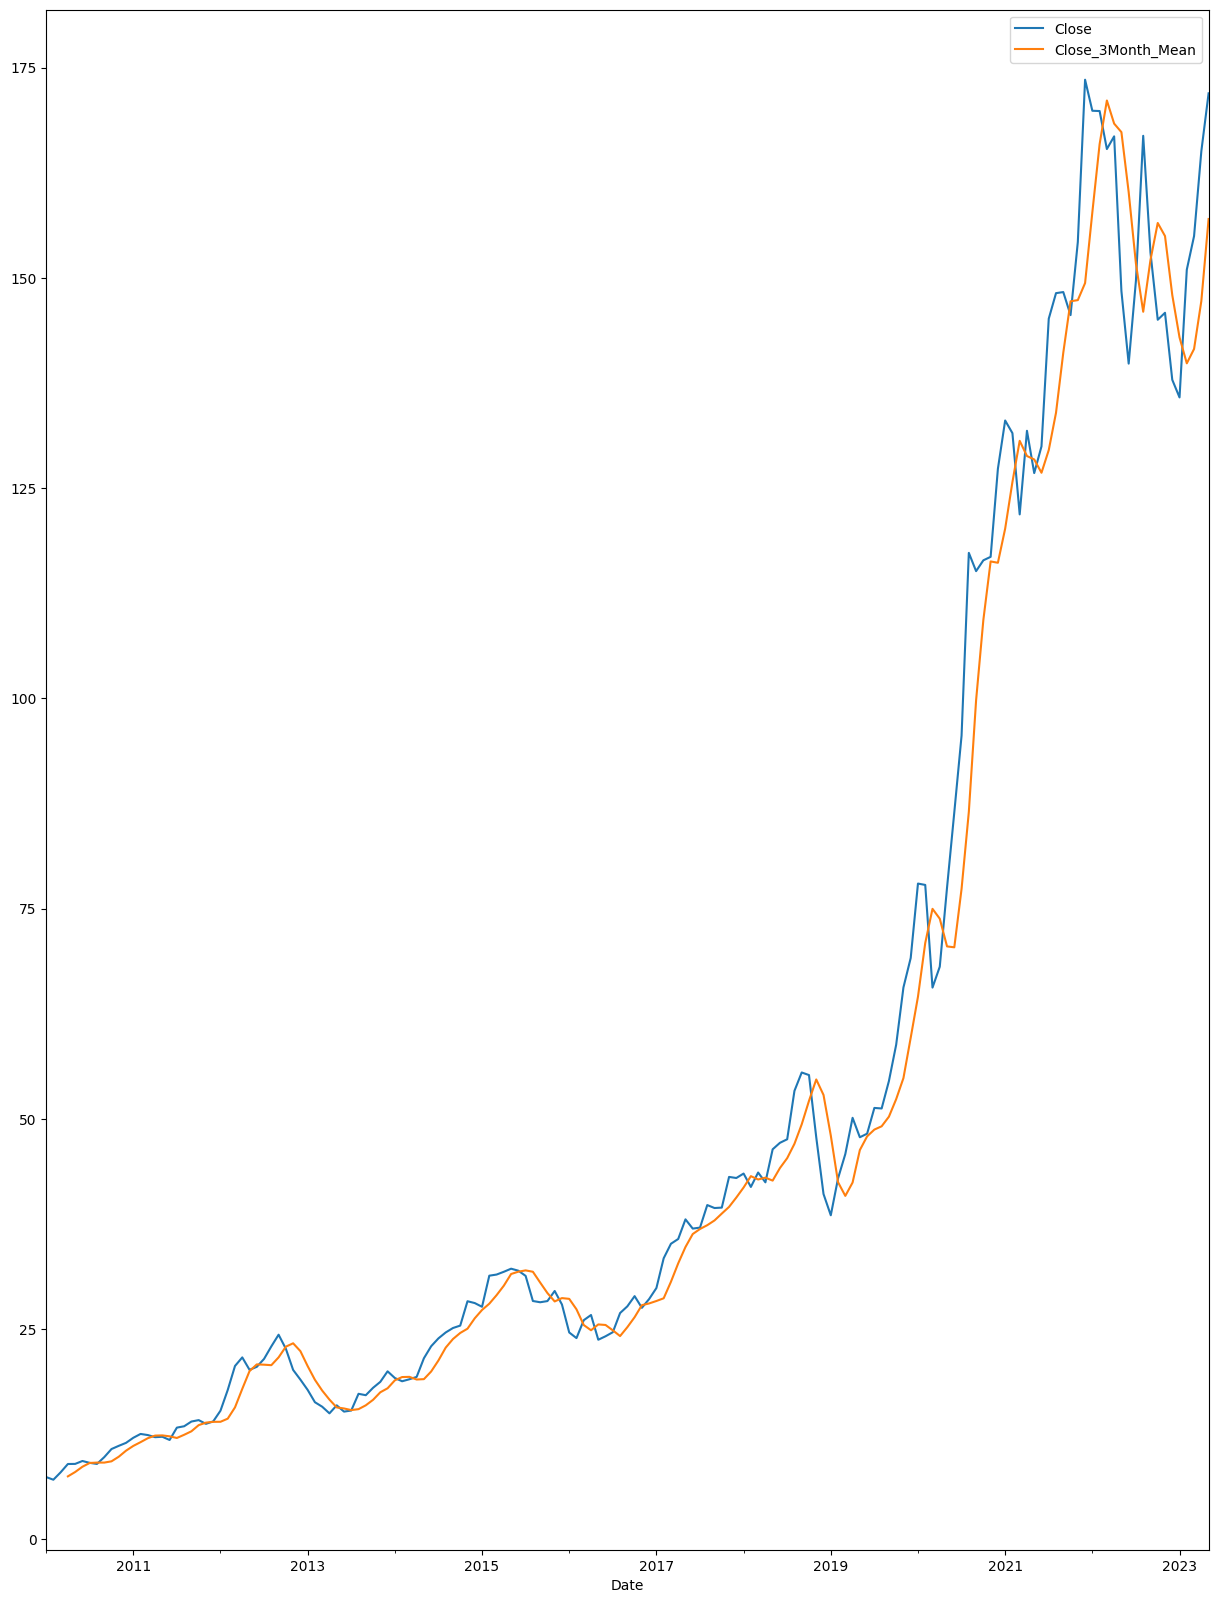

In [10]:
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15, 20))

## 정상성(stationarity) 과 차분(differencing)

In [11]:
## 차분
## getting drug sales dataset
file_path = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


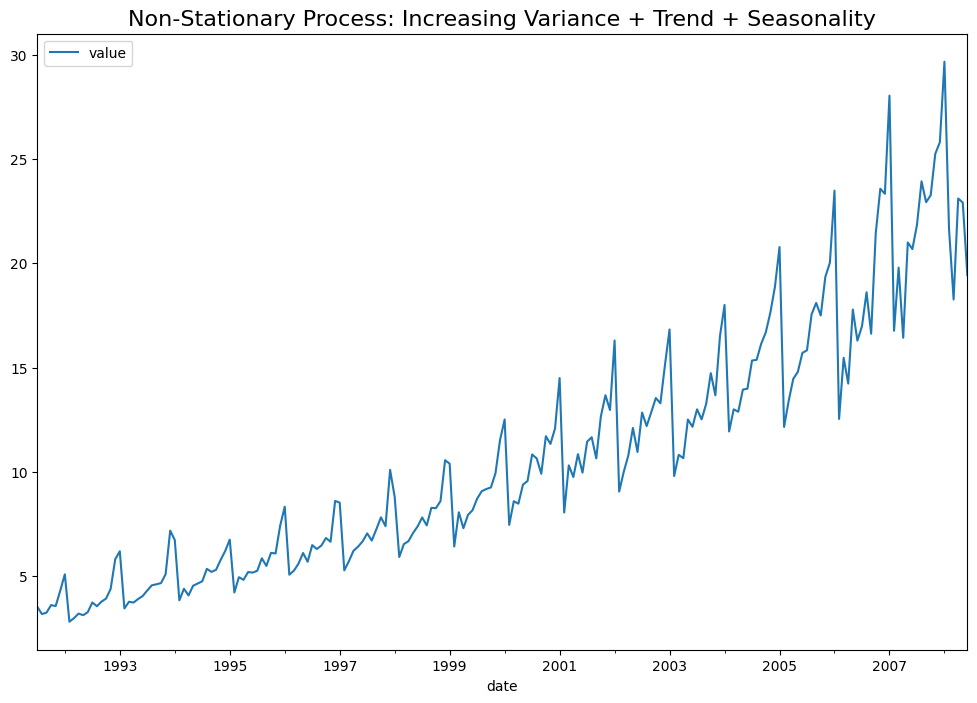

In [12]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality',
fontsize=16)
plt.show()

In [13]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

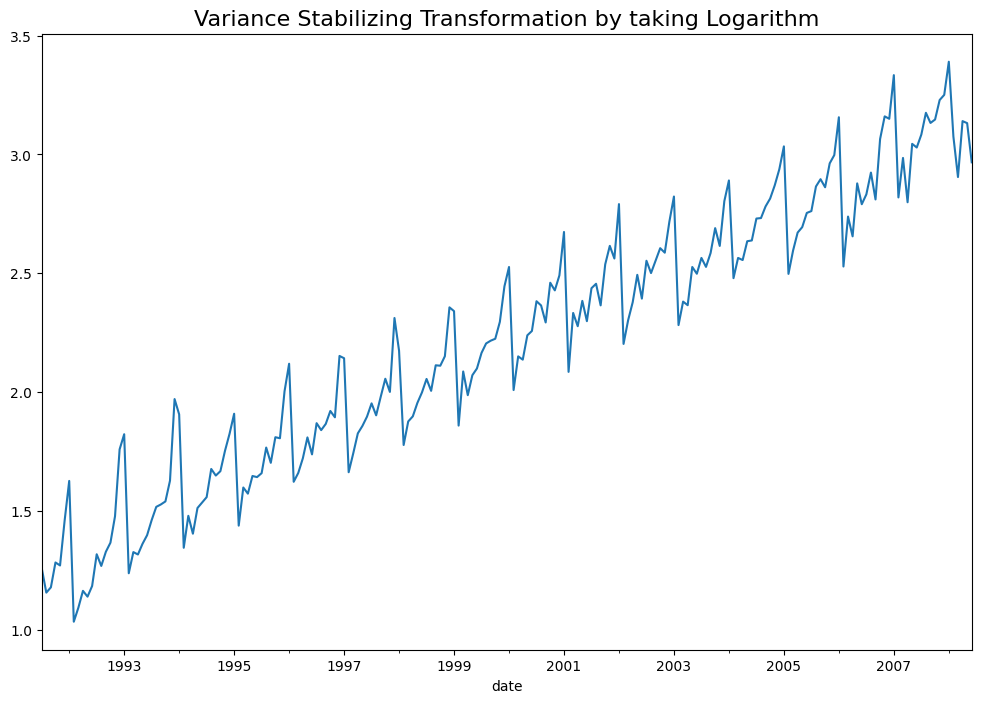

In [14]:
## plotting
df_vst.plot(figsize=(12, 8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

<Axes: xlabel='date'>

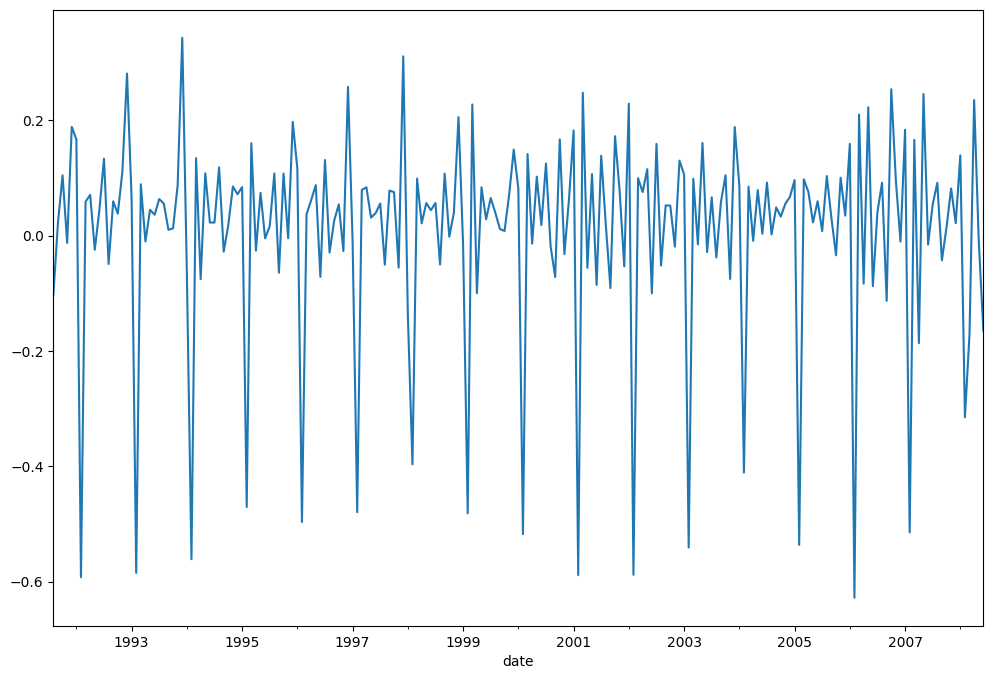

In [15]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
# plt.title("De-trend by 1st order Differencing", fontsize=16)
# plt.show()

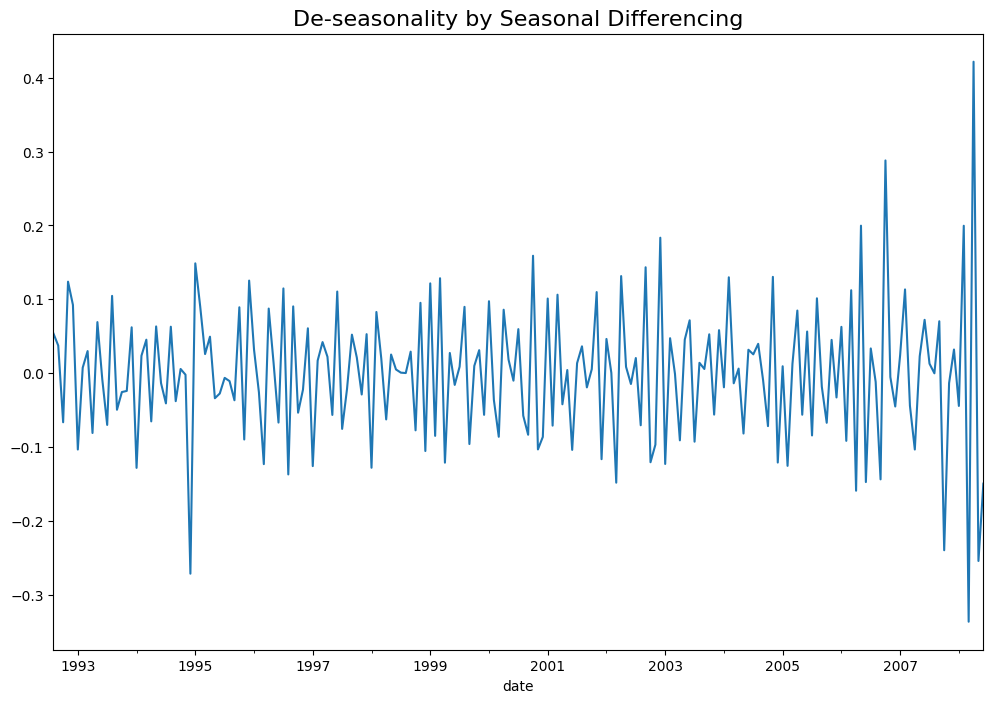

In [16]:
## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16)
plt.show()